# **Código de interés**

En este cuaderno se van a desarrollar los métodos y procesos necesarios para inicializar los diferentes proyectos propuestos. De esta forma, los principales puntos a tratar serán:


*   Descarga del dataset
*   Creación de directorios para las imágenes
*   Representación de imágenes de muestra
*   Desarrollo de data augmentation
*   Ejemplo de data augmentation
*   Descomposicion RGB



Estos procesos deberán de repetirse para cada modelo que empleemos.

## **Descarga del dataset**

In [ ]:
import kagglehub    # Libreria para la descarga de archivos de kaggle.

# Download latest version.
path = kagglehub.dataset_download("gpiosenka/railway-track-fault-detection-resized-224-x-224")

print("Path to dataset files:", path)

100%|██████████| 12.7M/12.7M [00:00<00:00, 56.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gpiosenka/railway-track-fault-detection-resized-224-x-224/versions/2


## **Desglose de datos**

In [ ]:
 # Necesitaremos la libreria os.
 import os

 # Directorio de entrenamiento:
 train_dir = os.path.join(path, 'train')
 # Directorio de pruebas:
 test_dir = os.path.join(path, 'test')
 # Directorio de validacion:
 valid_dir = os.path.join(path, 'valid')

 # Separamos los dos tipos de imagenes contenidas en cada uno de los directorios anteriores.
 # Para los datos de entrenamiento:
 train_Defective_dir = os.path.join(train_dir, 'Defective')
 train_NonDefective_dir = os.path.join(train_dir, 'Non defective')
 # Para los datos de pruebas:
 test_Defective_dir = os.path.join(test_dir, 'Defective')
 test_NonDefective_dir = os.path.join(test_dir, 'Non defective')
 # Para los datos de validacion:
 valid_Defective_dir = os.path.join(valid_dir, 'Defective')
 valid_NonDefective_dir = os.path.join(valid_dir, 'Non defective')

 # Vamos a ver la cantidad de imagenes de las que disponemos en un inicio:
 print('Imagenes defectuosas de entrenamiento:', len(os.listdir(train_Defective_dir)))
 print('Imagenes no defectuosas de entrenamiento:', len(os.listdir(train_NonDefective_dir)))
 print('Imagenes defectuosas de pruebas:', len(os.listdir(test_Defective_dir)))
 print('Imagenes no defectuosas de pruebas:', len(os.listdir(test_NonDefective_dir)))
 print('Imagenes defectuosas de validacion:', len(os.listdir(valid_Defective_dir)))
 print('Imagenes no defectuosas de validacion:', len(os.listdir(valid_NonDefective_dir)))

Imagenes defectuosas de entrenamiento: 150
Imagenes no defectuosas de entrenamiento: 150
Imagenes defectuosas de pruebas: 11
Imagenes no defectuosas de pruebas: 11
Imagenes defectuosas de validacion: 31
Imagenes no defectuosas de validacion: 31


## **Representación de los datos**

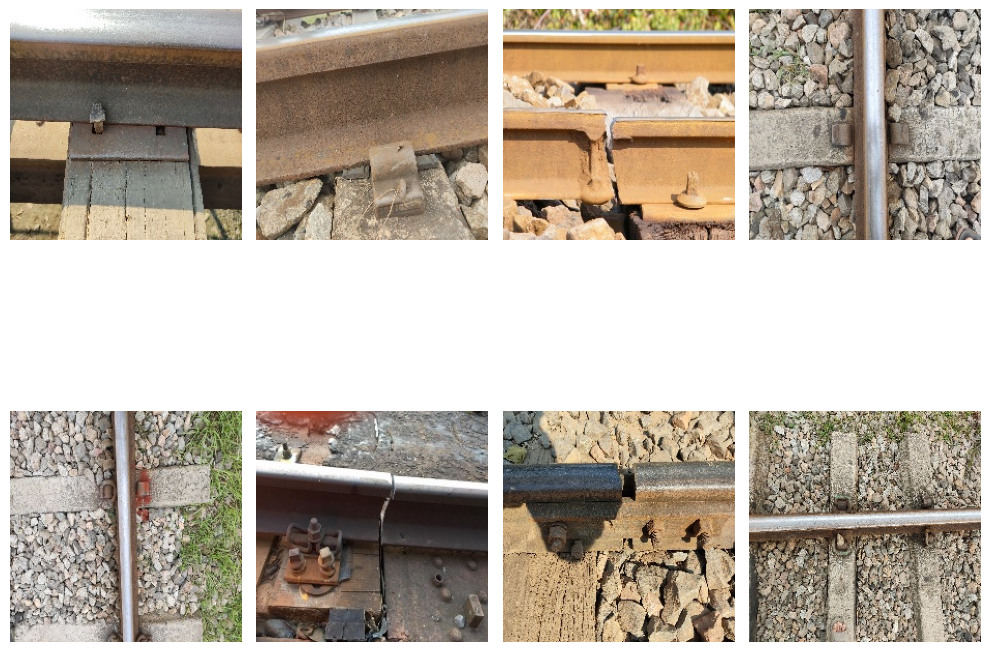

In [ ]:
# Importamos matplotlib para la representacion grafica.
import matplotlib.pyplot as plt
from keras.preprocessing import image # Esta libreria es necesaria para poder interpretar las imagenes.

# Asociamos las imagenes con su respectivo nombre.
fnames = [os.path.join(train_Defective_dir, fname) for fname in os.listdir(train_Defective_dir)]

# Definimos el numero de filas y columnas dentro de nuestro subplot.
num_filas = 2
num_colum = 4
num_imag = num_filas*num_colum

# Generamos las primeras 8 imagenes del subconjunto de vias defectuosas.
plt.figure(figsize=(10,10)) # Tamaño de figuras a representar.
for i in range(num_imag):
  img_path = fnames[i]
  img = image.load_img(img_path)
  plt.subplot(num_filas, num_colum, i+1)
  plt.imshow(img, aspect='equal')
  plt.axis('off')

plt.tight_layout()
plt.show()

## **Aplicación de datagen**

In [ ]:
# Importamos el objeto ImageDataGenerator contenido en Keras.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos las operaciones que se realizaran para data augmentation.
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalizamos los datos.
    rotation_range=25,      # Angulo de rotacion maximo de 45º.
    shear_range=0.3,          # Angulo de corte maximo de 3º.
    zoom_range=0.1,         # Zoom de hasta un 20%.
    horizontal_flip=True,   # Flip en el eje horizontal.
    vertical_flip=False,    # Flip en el eje vertical.
    width_shift_range=0.1,  # Desplazamiento horizontal de hasta 20%.
    height_shift_range=0.1, # Desplazamiento vertical de hasta 20%.
    fill_mode='nearest')    # Rellena los pixeles faltantes con el pixel mas cercano.

# Es importante que los generadores de validacion y de prueba solo reciban reescalado.
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

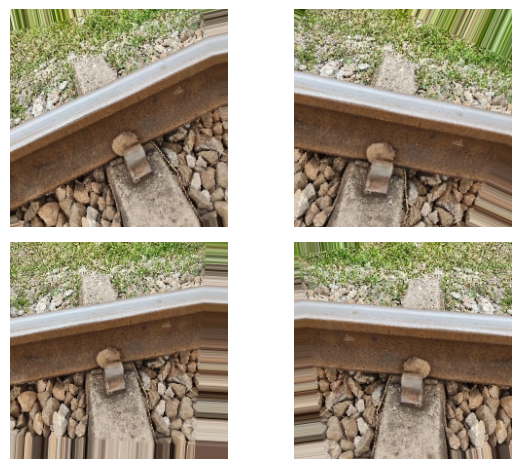

In [ ]:
# Importamos matplotlib para la representacion grafica.
import matplotlib.pyplot as plt
from keras.preprocessing import image # Esta libreria es necesaria para poder interpretar las imagenes.

fnames = [os.path.join(train_Defective_dir, fname) for fname in os.listdir(train_Defective_dir)]

# Vamos a aplicar data augmentation sobre una de las imagenes del conjunto.
img_path = fnames[14]
img = image.load_img(img_path)

x = image.img_to_array(img)   # Convertimos la imagen a un array de valores donde cada valor representa un pixel.
x = x.reshape((1,) + x.shape) # Añadimos una dimension extra a nuestro array para que keras pueda interpretarlo como un lote batch.

# Vamos a representar un total de 4 variaciones para una unica imagen.
i = 0
for batch in train_datagen.flow(x, batch_size=1): # Con batch_size=1 indicamos que generamos una nueva transformacion con cada ciclo.
  plt.subplot(2, 2, i+1)  # Representamos las imagenes en un subplot 2x2.
  plt.imshow(image.array_to_img(batch[0]))  # Convertimos la imagen en formato array de vuelta a formato jpg.
  plt.axis('off')
  i+=1
  if i%4 == 0:  # Repetimos 4 veces el bucle y terminamos el proceso.
    break

plt.tight_layout()
plt.show()

## **Descomposicion RGB**

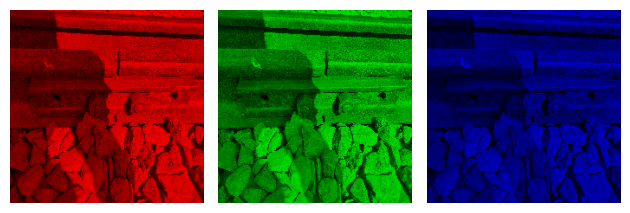

In [ ]:
import numpy as np

fnames = [os.path.join(train_Defective_dir, fname) for fname in os.listdir(train_Defective_dir)]

# Vamos a aplicar data augmentation sobre una de las imagenes del conjunto.
img_path = fnames[9]
img = image.load_img(img_path)

img_red=np.copy(img) # creo una copia de la imagen para preservar la original.
img_red[:,:,1]=0
img_red[:,:,2]=0

img_green=np.copy(img) # creo una copia de la imagen para preservar la original.
img_green[:,:,0]=0
img_green[:,:,2]=0

img_blue=np.copy(img) # creo una copia de la imagen para preservar la original.
img_blue[:,:,0]=0
img_blue[:,:,1]=0

plt.subplot(1, 3, 1)
plt.imshow(img_red,vmin=0,vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_green,vmin=0,vmax=1)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_blue,vmin=0,vmax=1)
plt.axis('off')
plt.tight_layout()
plt.show()

## **Reducción de learning rate**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Se va a emplear código sacado directamente de la página oficial de keras para representar el efecto de las funciones
# de reducción de learning rate ReduceLROnPlateau y LearningRateScheduler.

# Simular epochs
epochs = np.arange(0, 50)

# 1. Simulación de ReduceLROnPlateau
lr_rp = []
lr = 0.01
patience = 5
factor = 0.5
wait = 0
best_val = 1.0

# Simulación de pérdida de validación
val_losses = [1.0 - (0.01 * epoch) if epoch < 15 else 0.85 + (0.01 * (epoch - 15)) for epoch in epochs]

for epoch, val in zip(epochs, val_losses):
    if val < best_val:
        best_val = val
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            lr *= factor
            wait = 0
    lr_rp.append(lr)

# 2. Simulación de LearningRateScheduler
def scheduler(epoch, base_lr=0.01):
    return base_lr * (0.5 ** (epoch // 10))

lr_ls = [scheduler(epoch) for epoch in epochs]

# Gráfico 1: ReduceLROnPlateau
plt.figure(figsize=(8, 4))
plt.plot(epochs, lr_rp, label='ReduceLROnPlateau', marker='o', color='blue')
plt.title('ReduceLROnPlateau')
plt.xlabel('Épocas')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: LearningRateScheduler
plt.figure(figsize=(8, 4))
plt.plot(epochs, lr_ls, label='LearningRateScheduler', marker='s', color='green')
plt.title('LearningRateScheduler')
plt.xlabel('Épocas')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.tight_layout()
plt.show()
